## Лабораторная работа №1. Создание "истории о данных"
### Задание:

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
1. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
1. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
1. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
1. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('C:/Users/user/Downloads/insurance.csv', sep=',')
data = data.dropna()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
 # типы колонок
 [str(i) for i in data.dtypes],
 # проверим есть ли пропущенные значения
 [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features


[('age', ('int64', 0)),
 ('sex', ('object', 0)),
 ('bmi', ('float64', 0)),
 ('children', ('int64', 0)),
 ('smoker', ('object', 0)),
 ('region', ('object', 0)),
 ('charges', ('float64', 0))]

<AxesSubplot:>

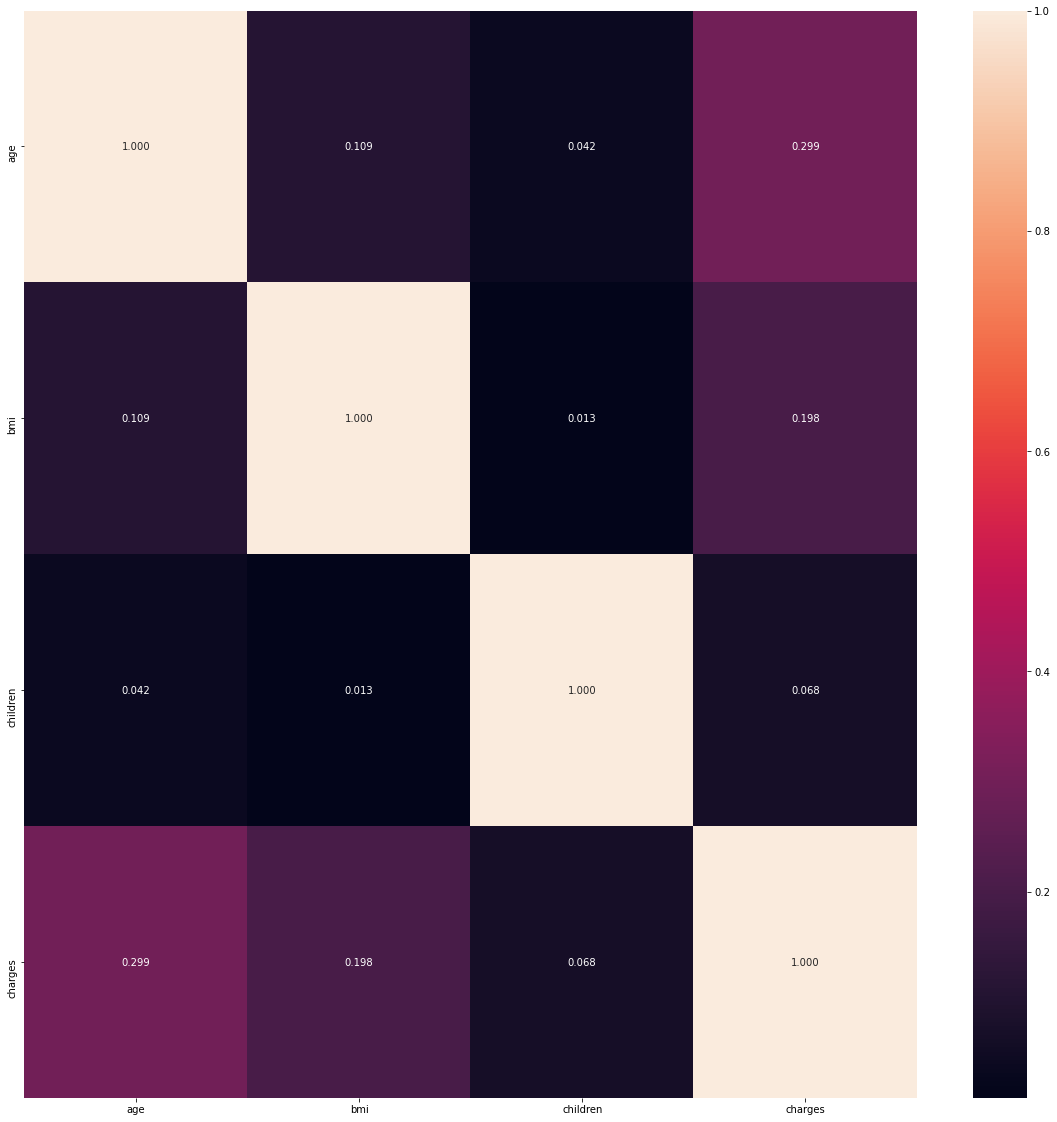

In [4]:
fig, ax = plt.subplots(figsize=(20,20))       
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<ipython-input-7-939f5eb9f65a>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


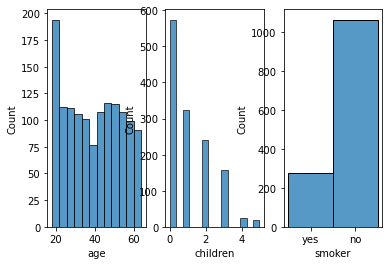

In [7]:
fig, ax = plt.subplots(1, 3)
sns.histplot(data['age'], ax=ax[0])
sns.histplot(data['children'], ax=ax[1])
sns.histplot(data['smoker'], ax=ax[2])
fig.show()

<AxesSubplot:xlabel='age', ylabel='smoker'>

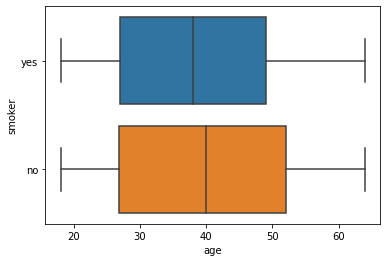

In [9]:
sns.boxplot(x=data["age"], y=data["smoker"])

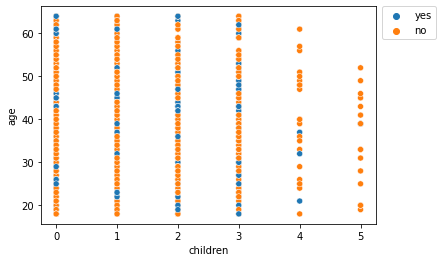

In [13]:
sns.scatterplot(y=data["age"], x=data["children"], hue=data["smoker"], legend=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='age', ylabel='region'>

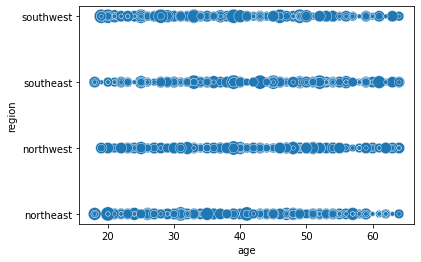

In [26]:
sns.scatterplot(data=data, x="age", y="region", size="children", legend=False, sizes=(20, 200))